In [1]:
# using my local development version Hyperopt, will modify when split the code
using Hyperopt, Distributions, Random, Plots

In [2]:
# 1d simulation
bws = [0.5 0.1 0.05]
d = Normal(0, 1)
observations = rand(d, 700)
x = LinRange(-2, 2, 100)
ys = []
for bw in bws
    kde = Hyperopt.LazyKDE(observations, bw, Hyperopt.Continuous(), Hyperopt.gaussian, true)
    y = [Hyperopt.pdf(kde, _x, keep_all=false) for _x in x]
    push!(ys, y)
end

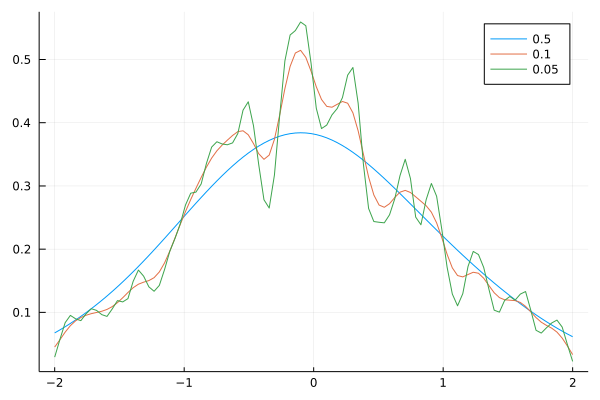

In [3]:
# 1d plot
plot(x, ys, label=bws)

In [4]:
# 2d simulation
dims = [Hyperopt.Continuous(), Hyperopt.Continuous()]
bws = [[0.3, 0.3], [0.5, 0.5], [1, 1]]
mn = MvNormal([0, 0], [1, 1])
observations = rand(mn, 700)
observations = [observations[:, i] for i in 1:size(observations, 2)]
x = LinRange(-1, 1, 100)
x_grid = [[_x, _y] for _x in x for _y in x]
y_grid = []
for bw in bws
    kde = Hyperopt.MultivariateKDE(dims, bw, observations)
    y = [Hyperopt.pdf(kde, _x) for _x in x_grid]
    push!(y_grid, y)
end

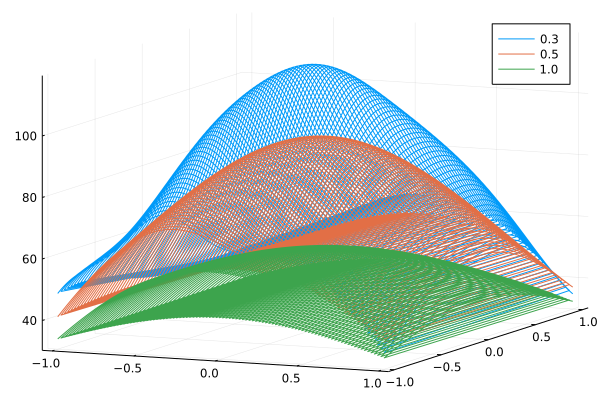

In [5]:
# 2d plot
plot([_x[1] for _x in x_grid], [_x[2] for _x in x_grid], y_grid, label=[0.3 0.5 1])